In [24]:

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

pd.set_option("display.max_columns", None)
data = pd.read_csv("/Users/vlad/Desktop/archive/Music_recommendation_withProperRagas.csv", low_memory=False)


In [25]:
data.head()

,track_id,track_name,track_artist,track_popularity,track_album_id,track_album_name,track_album_release_date,playlist_name,playlist_id,playlist_genre,playlist_subgenre,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,Mental_Health_Label,raga_name,raga_label,instrument
0,697MjF1454XKvZmTuqkWmD,I Miss You,Jeriqo,45,2vJ6FDg6ZMS56U8Wbiw2Oz,I Miss You,2019-02-05,Pop Hits 2000-2019,6mtYuOxzl58vSGnEDtZ9uB,edm,pop edm,0.520,0.789,0,-7.717,1,0.0432,0.004910,0.000013,0.0816,0.415,174.026,216347,Normal/Unclassified,NaN,Bageshree,Unknown
1,3x2bXiU0o4WbsPkawXlfDA,Who Are You,The Who,17,6LRJF97hgXHj8uMLHyCDbh,Who Are You (Remastered),1978-08-18,House Of The Rising Sun,1bMYfBHYBCRHY5LGkjlpSy,rock,album rock,0.651,0.661,9,-11.405,1,0.0511,0.265000,0.003130,0.1060,0.489,156.371,378707,Normal/Unclassified,NaN,Yaman,Guitar/Drums
2,0jEaPBjFAWjQTMVouRwaHi,Happy,The Beef Seeds,30,4IQn9XpweytNX2cUe2NBUH,Keepin' it Beefy,2015-01-19,Bluegrass Covers,37i9dQZF1DX56crgoe4TG3,r&b,hip pop,0.640,0.758,10,-5.204,1,0.1600,0.665000,0.000000,0.1270,0.932,86.529,218044,Bipolar (Mania),NaN,Kafi,Unknown
3,5EKUb1FKsyYVaSXb41YBIj,ONE,Rev Theory,35,0gGic19XvEiHKKWBV7M4YM,ONE,2020-01-15,Rock Hard,37i9dQZF1DWWJOmJ7nRx0C,rock,hard rock,0.398,0.966,4,-2.352,0,0.0453,0.000006,0.000000,0.3030,0.520,90.016,208196,Normal/Unclassified,NaN,Bageshree,Guitar/Drums
4,300DUx4tdtCdGEUXR032jA,Palace/Curse,The Internet,62,69g3CtOVg98TPOwqmI2K7Q,Ego Death,2015-06-26,NEO-soul,3q3M4VCymcMoxJ3Tl7mRqN,r&b,neo soul,0.447,0.625,10,-8.212,0,0.3230,0.035100,0.000727,0.2430,0.261,67.104,440013,Normal/Unclassified,NaN,Kafi,Unknown


In [26]:
data.track_name.value_counts()

track_name
Poison                         22
Breathe                        21
Alive                          20
Forever                        20
Paradise                       19
                               ..
White Man - Remastered 2011     1
Bossa & People                  1
The High Road                   1
Give Me                         1
I Take Everything I Can         1
Name: count, Length: 23449, dtype: int64

In [27]:
data = data.drop(columns = ["track_id","track_name","track_album_id","playlist_id","raga_name","instrument"])

In [28]:
data

,track_artist,track_popularity,track_album_name,track_album_release_date,playlist_name,playlist_genre,playlist_subgenre,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,Mental_Health_Label,raga_label
0,Jeriqo,45,I Miss You,2019-02-05,Pop Hits 2000-2019,edm,pop edm,0.520,0.789,0,-7.717,1,0.0432,0.004910,0.000013,0.0816,0.415,174.026,216347,Normal/Unclassified,Bageshree
1,The Who,17,Who Are You (Remastered),1978-08-18,House Of The Rising Sun,rock,album rock,0.651,0.661,9,-11.405,1,0.0511,0.265000,0.003130,0.1060,0.489,156.371,378707,Normal/Unclassified,Yaman
2,The Beef Seeds,30,Keepin' it Beefy,2015-01-19,Bluegrass Covers,r&b,hip pop,0.640,0.758,10,-5.204,1,0.1600,0.665000,0.000000,0.1270,0.932,86.529,218044,Bipolar (Mania),Kafi
3,Rev Theory,35,ONE,2020-01-15,Rock Hard,rock,hard rock,0.398,0.966,4,-2.352,0,0.0453,0.000006,0.000000,0.3030,0.520,90.016,208196,Normal/Unclassified,Bageshree
4,The Internet,62,Ego Death,2015-06-26,NEO-soul,r&b,neo soul,0.447,0.625,10,-8.212,0,0.3230,0.035100,0.000727,0.2430,0.261,67.104,440013,Normal/Unclassified,Kafi
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32828,Hartman,30,What Do You Want,2019-03-15,Tropical House 🌴,latin,tropical,0.714,0.818,0,-2.828,1,0.0312,0.315000,0.000000,0.4410,0.521,99.946,170400,Normal/Unclassified,Bageshree
32829,Brothers,57,Trendy,2019-12-01,A1 Hip-Hop,rap,hip hop,0.815,0.624,6,-6.096,0,0.4490,0.389000,0.000000,0.0724,0.561,139.736,180152,Normal/Unclassified,Yaman
32830,Guns N' Roses,49,Chinese Democracy,2008-01-01,This Is Guns N' Roses,rock,album rock,0.402,0.502,2,-10.009,0,0.0315,0.070200,0.000064,0.1150,0.209,147.519,374187,Normal/Unclassified,Bageshree
32831,Highlands Worship,31,You're Here - EP,2018-07-06,Christian Dance Party,pop,dance pop,0.589,0.592,7,-7.887,0,0.0334,0.005980,0.000000,0.0614,0.348,141.131,213723,Normal/Unclassified,Bageshree


In [29]:
counts = data["track_artist"].value_counts()
rare_artists = counts[counts <= 90].index

counts1 = data["track_album_name"].value_counts()
rare_album = counts1[counts1 <= 20].index

counts2 = data["track_album_release_date"].value_counts()
rare_year = counts2[counts2 <= 150].index

counts3 = data["playlist_name"].value_counts()
rare_playlist = counts3[counts3 <= 160].index


In [30]:
data["track_artist"] = data["track_artist"].where(
    ~data["track_artist"].isin(rare_artists),
    "Other artis"
)

data["track_album_name"] = data["track_album_name"].where(
    ~data["track_album_name"].isin(rare_album),
    "Other album"
)

data["track_album_release_date"] = data["track_album_release_date"].where(
    ~data["track_album_release_date"].isin(rare_year),
    "Other year"
)

data["playlist_name"] = data["playlist_name"].where(
    ~data["playlist_name"].isin(rare_playlist),
    "Other playlist"
)

In [31]:
data.Mental_Health_Label.value_counts()

Mental_Health_Label
Normal/Unclassified     22145
Bipolar (Mania)          5016
Anxiety                  4922
Bipolar (Depression)      335
Depression                138
Autism                    114
Schizophrenia             109
PTSD                       38
Dementia                    8
OCD                         8
Name: count, dtype: int64

In [32]:
data.dropna(inplace=True)
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 32828 entries, 0 to 32832
Data columns (total 21 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   track_artist              32828 non-null  object 
 1   track_popularity          32828 non-null  int64  
 2   track_album_name          32828 non-null  object 
 3   track_album_release_date  32828 non-null  object 
 4   playlist_name             32828 non-null  object 
 5   playlist_genre            32828 non-null  object 
 6   playlist_subgenre         32828 non-null  object 
 7   danceability              32828 non-null  float64
 8   energy                    32828 non-null  float64
 9   key                       32828 non-null  int64  
 10  loudness                  32828 non-null  float64
 11  mode                      32828 non-null  int64  
 12  speechiness               32828 non-null  float64
 13  acousticness              32828 non-null  float64
 14  instrumenta

In [33]:
from sklearn.model_selection import train_test_split

X = data.drop(["Mental_Health_Label"],axis = 1)
y = data["Mental_Health_Label"]

In [34]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, stratify=y, random_state= 50)

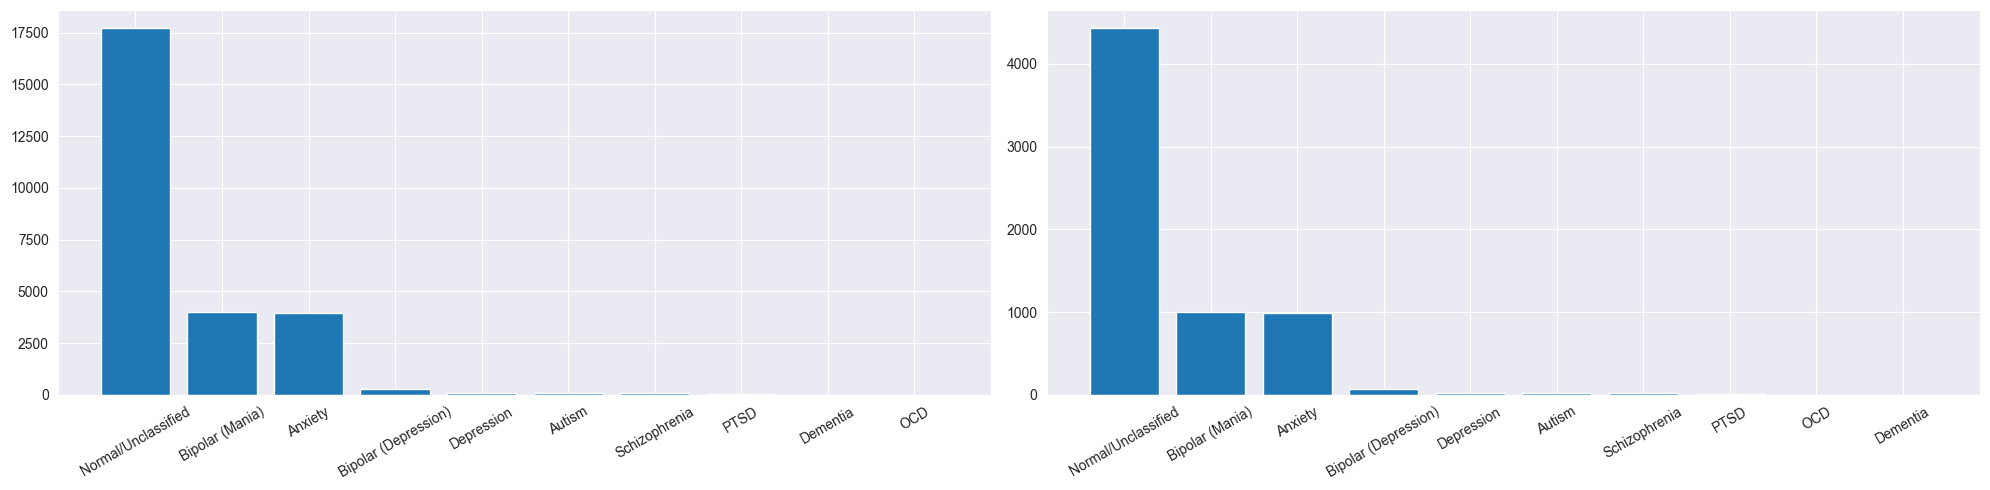

In [35]:

countst = y_train.value_counts()

countsy = y_test.value_counts()

figure, axes = plt.subplots(1,2, figsize = (20,5))

axes[0].bar(countst.index, countst.values)
axes[0].tick_params(axis ="x", rotation = 30)

axes[1].bar(countsy.index, countsy.values)
axes[1].tick_params(axis ="x", rotation = 30)

plt.tight_layout()


In [36]:
train_data = X_train.join(y_train)

array([[<Axes: title={'center': 'track_popularity'}>,
        <Axes: title={'center': 'danceability'}>,
        <Axes: title={'center': 'energy'}>,
        <Axes: title={'center': 'key'}>],
       [<Axes: title={'center': 'loudness'}>,
        <Axes: title={'center': 'mode'}>,
        <Axes: title={'center': 'speechiness'}>,
        <Axes: title={'center': 'acousticness'}>],
       [<Axes: title={'center': 'instrumentalness'}>,
        <Axes: title={'center': 'liveness'}>,
        <Axes: title={'center': 'valence'}>,
        <Axes: title={'center': 'tempo'}>],
       [<Axes: title={'center': 'duration_ms'}>, <Axes: >, <Axes: >,
        <Axes: >]], dtype=object)

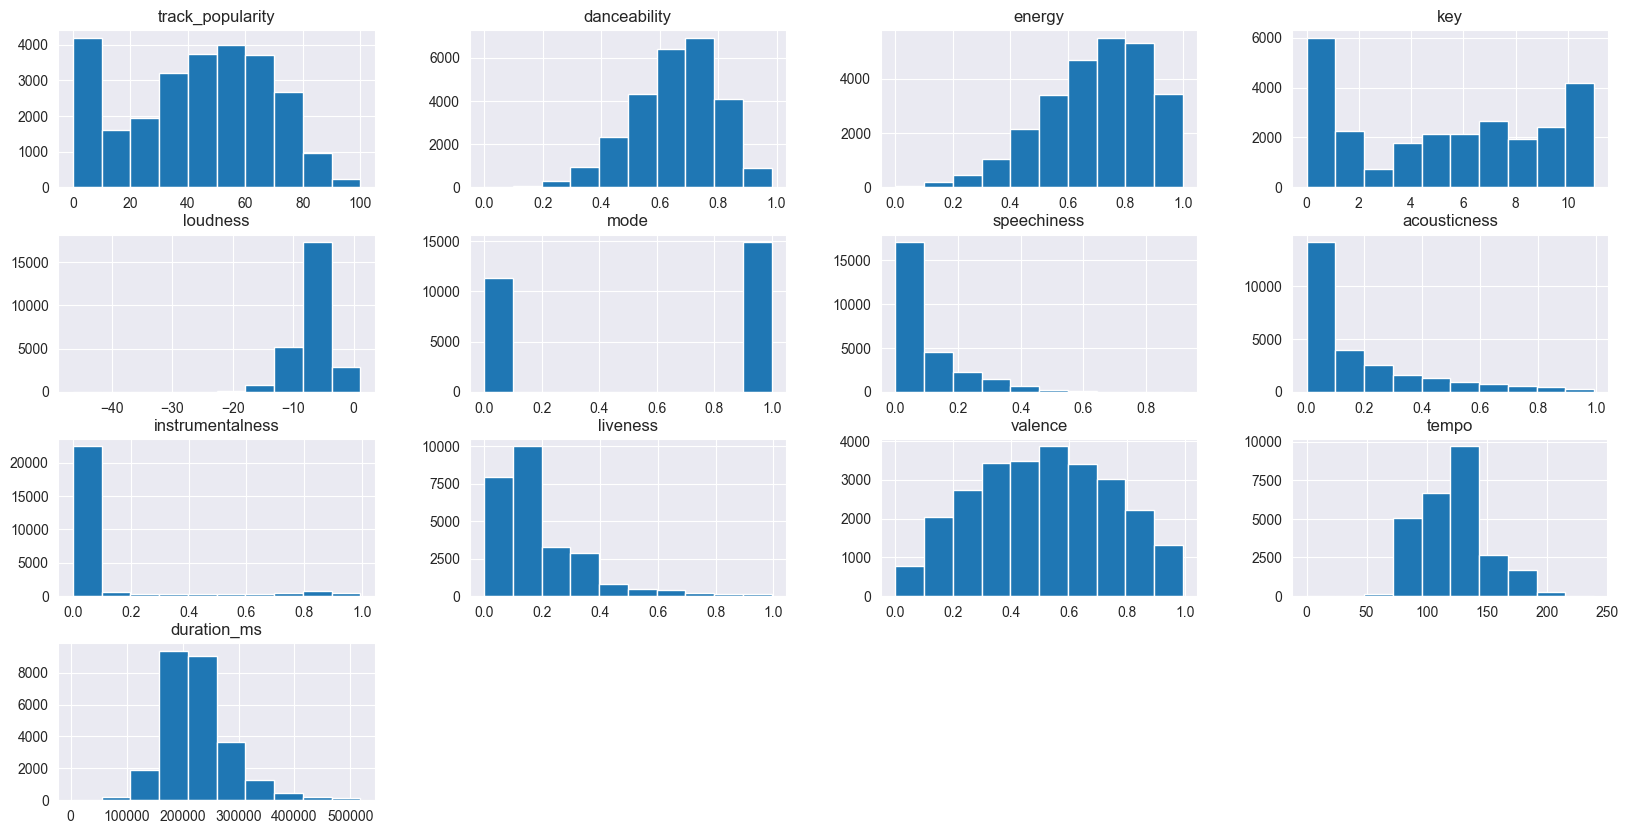

In [37]:
train_data.hist(figsize = (20,10))

Cross-validation score: [0.99836197 0.99673564 0.99647124]
Train score: [1. 1. 1.]
Cross-validation mean: 0.9971896182301889
Cross-validation std: 0.0008359781440242405
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3937
           1       0.95      0.98      0.96        91
           2       0.97      0.98      0.98       268
           3       1.00      1.00      1.00      4012
           4       0.80      0.57      0.67         7
           5       0.99      0.98      0.99       110
           6       1.00      1.00      1.00     17713
           7       1.00      0.14      0.25         7
           8       0.89      0.83      0.86        30
           9       0.99      0.91      0.95        87

    accuracy                           1.00     26262
   macro avg       0.96      0.84      0.86     26262
weighted avg       1.00      1.00      1.00     26262



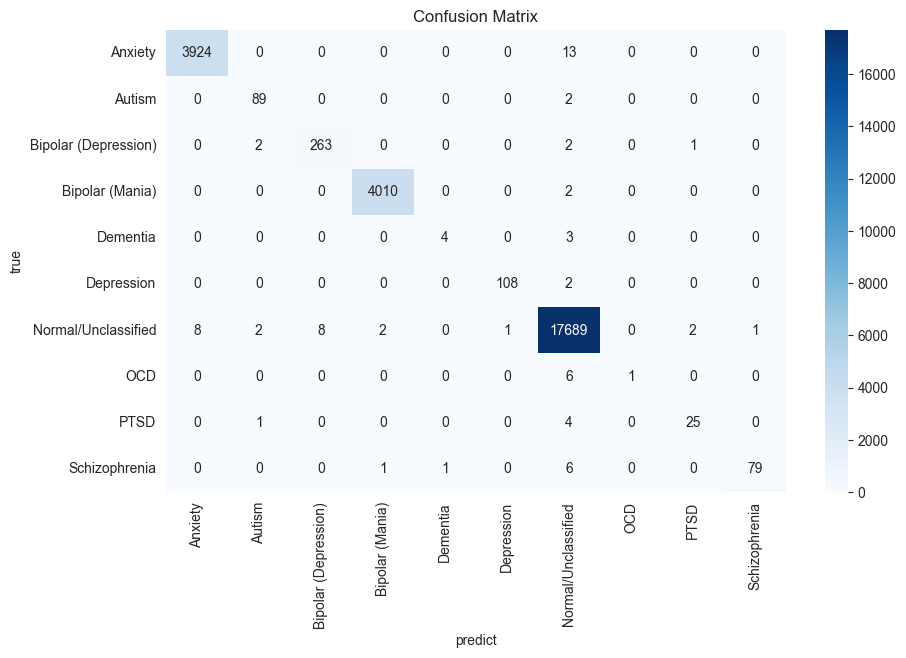

Shuffled cv-score: 0.5439724638570125


In [38]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV, cross_validate, cross_val_predict
from sklearn.metrics import confusion_matrix, classification_report, ConfusionMatrixDisplay
from xgboost import XGBClassifier
import seaborn as sns
import matplotlib.pyplot as plt

columns_obj = X_train.select_dtypes(['object']).columns.tolist()
integers_col = X_train.drop(['track_popularity'], axis=1).select_dtypes(['int', 'float64']).columns.tolist()


le = LabelEncoder()

y_train_label = le.fit_transform(y_train)
y_test_label = le.transform(y_test)

preprocessor = ColumnTransformer(
    transformers = [
        ('obj_data', OneHotEncoder(handle_unknown='ignore'), columns_obj),
        ('int_data', 'passthrough', integers_col),
    ]
)

pipe = Pipeline([
    ('preproc', preprocessor),
    ('model', XGBClassifier(objective="binary:logistic", eval_metric="logloss", random_state= 50))
])

cv_score = cross_validate(pipe, X_train, y_train_label,scoring='f1_weighted', cv=3, return_train_score= True)

print(f"Cross-validation score: {cv_score['test_score']}")
print(f"Train score: {cv_score['train_score']}")
print(f"Cross-validation mean: {np.mean(cv_score['test_score'])}")
print(f"Cross-validation std: {np.std(cv_score['test_score'])}")

X_t_predict = cross_val_predict(pipe, X_train,y_train_label,cv=3 , method='predict')

print(classification_report(y_train_label,X_t_predict))

conf_matx= confusion_matrix(y_train_label,X_t_predict)

plt.figure(figsize=(10,6))

sns.heatmap(conf_matx, annot=True, fmt='d', cmap='Blues', xticklabels= le.classes_, yticklabels=le.classes_)
plt.xlabel("predict")
plt.ylabel('true')
plt.title('Confusion Matrix')
plt.show()


y_shuffled = np.random.permutation(y_train_label)

cv_score = cross_validate(
    pipe,
    X_train,
    y_shuffled,
    scoring='f1_weighted',
    cv=3
)

print(f"Shuffled cv-score: {np.mean(cv_score['test_score'])}")


In [39]:
param_grid = {
        "model__n_estimators": [200, 400],
        "model__learning_rate": [0.03, 0.05],
        "model__max_depth": [3, 5]
}

grid = GridSearchCV(pipe, param_grid, cv=3, scoring="roc_auc_ovr", return_train_score= True)

grid.fit(X_train,y_train_label)

,"estimator estimator: estimator objectThis is assumed to implement the scikit-learn estimator interface.Either estimator needs to provide a ``score`` function,or ``scoring`` must be passed.","Pipeline(step...=None, ...))])"
,"param_grid param_grid: dict or list of dictionariesDictionary with parameters names (`str`) as keys and lists ofparameter settings to try as values, or a list of suchdictionaries, in which case the grids spanned by each dictionaryin the list are explored. This enables searching over any sequenceof parameter settings.","{'model__learning_rate': [0.03, 0.05], 'model__max_depth': [3, 5], 'model__n_estimators': [200, 400]}"
,"scoring scoring: str, callable, list, tuple or dict, default=NoneStrategy to evaluate the performance of the cross-validated model onthe test set.If `scoring` represents a single score, one can use:- a single string (see :ref:`scoring_string_names`);- a callable (see :ref:`scoring_callable`) that returns a single value;- `None`, the `estimator`'s :ref:`default evaluation criterion ` is used.If `scoring` represents multiple scores, one can use:- a list or tuple of unique strings;- a callable returning a dictionary where the keys are the metric names and the values are the metric scores;- a dictionary with metric names as keys and callables as values.See :ref:`multimetric_grid_search` for an example.",'roc_auc_ovr'
,"n_jobs n_jobs: int, default=NoneNumber of jobs to run in parallel.``None`` means 1 unless in a :obj:`joblib.parallel_backend` context.``-1`` means using all processors. See :term:`Glossary `for more details... versionchanged:: v0.20 `n_jobs` default changed from 1 to None",None
,"refit refit: bool, str, or callable, default=TrueRefit an estimator using the best found parameters on the wholedataset.For multiple metric evaluation, this needs to be a `str` denoting thescorer that would be used to find the best parameters for refittingthe estimator at the end.Where there are considerations other than maximum score inchoosing a best estimator, ``refit`` can be set to a function whichreturns the selected ``best_index_`` given ``cv_results_``. In thatcase, the ``best_estimator_`` and ``best_params_`` will be setaccording to the returned ``best_index_`` while the ``best_score_``attribute will not be available.The refitted estimator is made available at the ``best_estimator_``attribute and permits using ``predict`` directly on this``GridSearchCV`` instance.Also for multiple metric evaluation, the attributes ``best_index_``,``best_score_`` and ``best_params_`` will only be available if``refit`` is set and all of them will be determined w.r.t this specificscorer.See ``scoring`` parameter to know more about multiple metricevaluation.See :ref:`sphx_glr_auto_examples_model_selection_plot_grid_search_digits.py`to see how to design a custom selection strategy using a callablevia `refit`.See :ref:`this example`for an example of how to use ``refit=callable`` to balance modelcomplexity and cross-validated score... versionchanged:: 0.20 Support for callable added.",True
,"cv cv: int, cross-validation generator or an iterable, default=NoneDetermines the cross-validation splitting strategy.Possible inputs for cv are:- None, to use the default 5-fold cross validation,- integer, to specify the number of folds in a `(Stratified)KFold`,- :term:`CV splitter`,- An iterable yielding (train, test) splits as arrays of indices.For integer/None inputs, if the estimator is a classifier and ``y`` iseither binary or multiclass, :class:`StratifiedKFold` is used. In allother cases, :class:`KFold` is used. These splitters are instantiatedwith `shuffle=False` so the splits will be the same across calls.Refer :ref:`User Guide ` for the variouscross-validation strategies that can be used here... versionchanged:: 0.22 ``cv`` default value if None changed from 3-fold to 5-fold.",3
,"verbose verbose: intControls the verbosity: the higher, the more messages.- >1 : the computation time for each fold and parameter candidat

In [40]:

print(grid.best_params_)
print(grid.best_index_)
print(grid.best_score_)
print(grid.best_estimator_)


best_rnd = grid.best_estimator_
best_rnd.score(X_test,y_test_label)

{'model__learning_rate': 0.03, 'model__max_depth': 5, 'model__n_estimators': 400}
3
0.995645114145591
Pipeline(steps=[('preproc',
                 ColumnTransformer(transformers=[('obj_data',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['track_artist',
                                                   'track_album_name',
                                                   'track_album_release_date',
                                                   'playlist_name',
                                                   'playlist_genre',
                                                   'playlist_subgenre',
                                                   'raga_label']),
                                                 ('int_data', 'passthrough',
                                                  ['danceability', 'energy',
                                                   'key', 'loudness', '

0.9971063052086506

In [41]:
cv_results = pd.DataFrame(grid.cv_results_)

In [42]:
cv_results["overfit_gap"] = (
    cv_results["mean_train_score"] - cv_results["mean_test_score"]
)

res = cv_results[
    [
        "params",
        "mean_train_score",
        "mean_test_score",
        "overfit_gap"
    ]
].sort_values("mean_test_score", ascending=False).head(10)

print(res[res['params'] == grid.best_params_].iloc[:,1:].to_string())
cols = [
        'split0_train_score', 'split1_train_score', 'split2_train_score',
    'split0_test_score', 'split1_test_score', 'split2_test_score'
]

print(cv_results[cols][cv_results['params'] == grid.best_params_])

   mean_train_score  mean_test_score  overfit_gap
3               1.0         0.995645     0.004355
   split0_train_score  split1_train_score  split2_train_score  \
3                 1.0                 1.0                 1.0   

   split0_test_score  split1_test_score  split2_test_score  
3           0.996679           0.992919           0.997337  


In [43]:
mod = best_rnd.named_steps['model']
prepr = best_rnd.named_steps['preproc']

features_names = prepr.get_feature_names_out()
importances = mod.feature_importances_

imp = pd.Series(importances, index= features_names).sort_values(ascending=False)
print(imp.head(10))

int_data__valence                       0.376616
int_data__energy                        0.224411
obj_data__raga_label_Darbari            0.169945
int_data__tempo                         0.126261
int_data__instrumentalness              0.016104
obj_data__raga_label_Bhairavi           0.013046
obj_data__raga_label_Kafi               0.010899
int_data__liveness                      0.008220
obj_data__playlist_subgenre_big room    0.005745
obj_data__playlist_genre_pop            0.005447
dtype: float32


                      precision    recall  f1-score   support

             Anxiety       1.00      1.00      1.00       984
              Autism       0.88      1.00      0.94        23
Bipolar (Depression)       1.00      0.99      0.99        67
     Bipolar (Mania)       1.00      0.99      0.99      1003
            Dementia       0.33      1.00      0.50         1
          Depression       1.00      1.00      1.00        28
 Normal/Unclassified       1.00      1.00      1.00      4429
                 OCD       0.00      0.00      0.00         1
                PTSD       0.89      1.00      0.94         8
       Schizophrenia       1.00      0.91      0.95        22

            accuracy                           1.00      6566
           macro avg       0.81      0.89      0.83      6566
        weighted avg       1.00      1.00      1.00      6566

0.9999802727412455


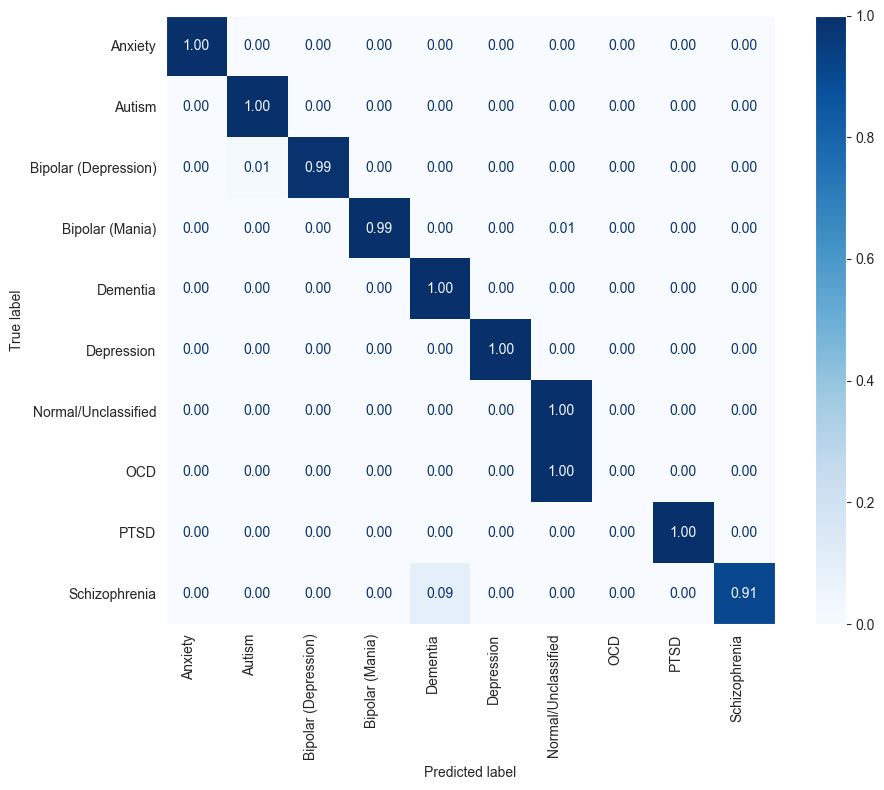

In [44]:
from sklearn.metrics import roc_auc_score

y_pred = best_rnd.predict(X_test)



print(classification_report(y_test_label, y_pred, target_names=le.classes_, zero_division=0))

y_proba = best_rnd.predict_proba(X_test)

roc = roc_auc_score(
    y_test_label,
    y_proba,
    multi_class="ovr"
)
print(roc)

fig, ax = plt.subplots(figsize=(10,8))

ConfusionMatrixDisplay.from_predictions(
    y_test_label,
    y_pred,
    normalize="true",
    cmap="Blues",
    ax=ax,
    display_labels= le.classes_,
    values_format=".2f"
)
plt.setp(ax.get_xticklabels(), rotation=90, ha="right")
ax.grid(False)
plt.tight_layout()
plt.show()

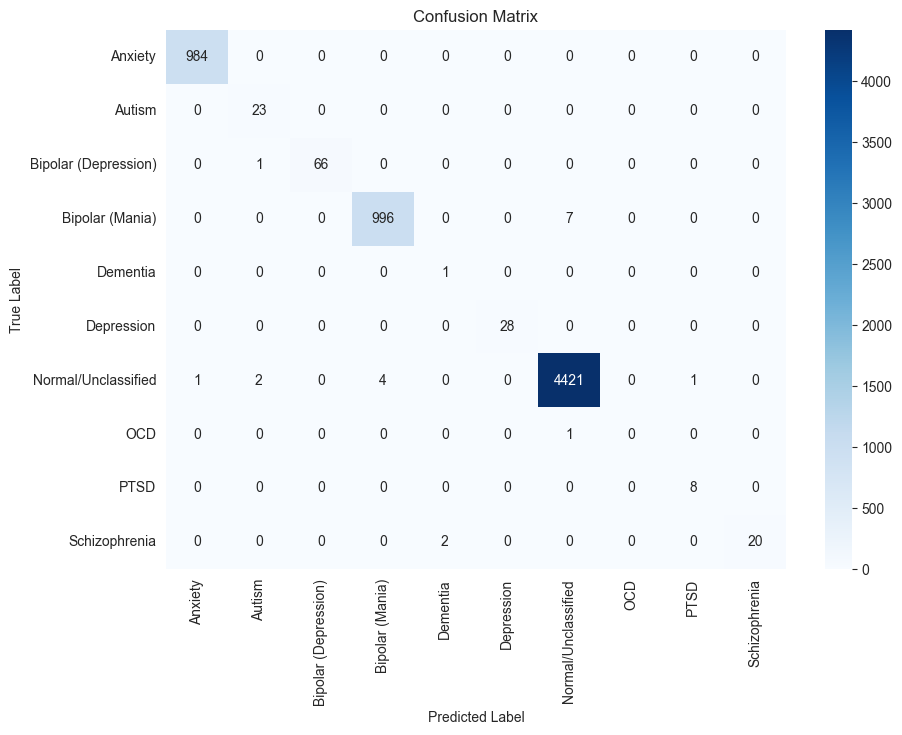

In [45]:

cm = confusion_matrix(y_test_label, y_pred)

plt.figure(figsize=(10,7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=le.classes_, yticklabels=le.classes_)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()